In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from time import time

In [3]:
!pip install sklearn

In [4]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
n=8
from sklearn import metrics

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



In [6]:
f = open('Downloads/Normalizedfeatures.csv')
attributes=f.readline()
X = []
y = []
for line in f:
    line = line.rstrip().split(',')
    l = [float(i) for i in line]
    X.append(l[:-1])
    y.append(l[-1])
    
X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [7]:
print (X_train.shape, X_test.shape)

(1926, 174) (642, 174)


In [8]:
#1-KNN
print('#1-KNN')
import time
start = time.time()

model = neighbors.KNeighborsClassifier(n_neighbors = 20)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))

end = time.time()
print("Time taken ", end - start)

#1-KNN
0.8613707165109035
Time taken  0.25394296646118164


In [9]:
get_ipython().system('pip install xgboost')

In [10]:
#  plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

In [11]:
conda install py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


[05:12:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[3.55621637e-03 9.53453884e-04 1.16611868e-01 3.99945164e-03
 1.30310748e-02 3.01020313e-03 2.43931767e-02 4.65037115e-03
 3.50065809e-03 2.67141755e-03 1.95582467e-03 2.37503904e-03
 1.00720702e-02 1.94685196e-03 2.86108558e-03 1.13917177e-03
 6.31768070e-03 4.66971705e-03 2.59603793e-03 1.94013736e-03
 3.38614220e-03 2.35539046e-03 1.66774984e-03 3.14802886e-03
 3.82371270e-03 6.78591430e-04 4.19162214e-03 3.55093228e-03
 3.24445940e-03 8.02662503e-03 1.40292547e-03 6.14952645e-04
 2.80921664e-02 1.82355917e-03 3.70064838e-04 2.71356218e-02
 2.88678217e-03 2.74345698e-03 1.47397781e-03 1.30535322e-04
 4.44879476e-03 7.43823685e-03 6.80464873e-05 0.00000000e+00
 2.24829279e-03 1.08128076e-03 4.22992482e-04 1.15488459e-04
 7.57554139e-04 6.86785439e-04 4.02762053e-05 2.13660672e-03
 1.05222105e-03 2.53889635e-02 6.40008249e-04 5.89097326e-05
 6.06255792e-03 3.29355011e-04 3.59292870e-04 1.62186334e-04
 2.55144667e-03 8.79043655e-04 3.14861513e-03 2.27860012e-03
 2.38553178e-03 2.379737

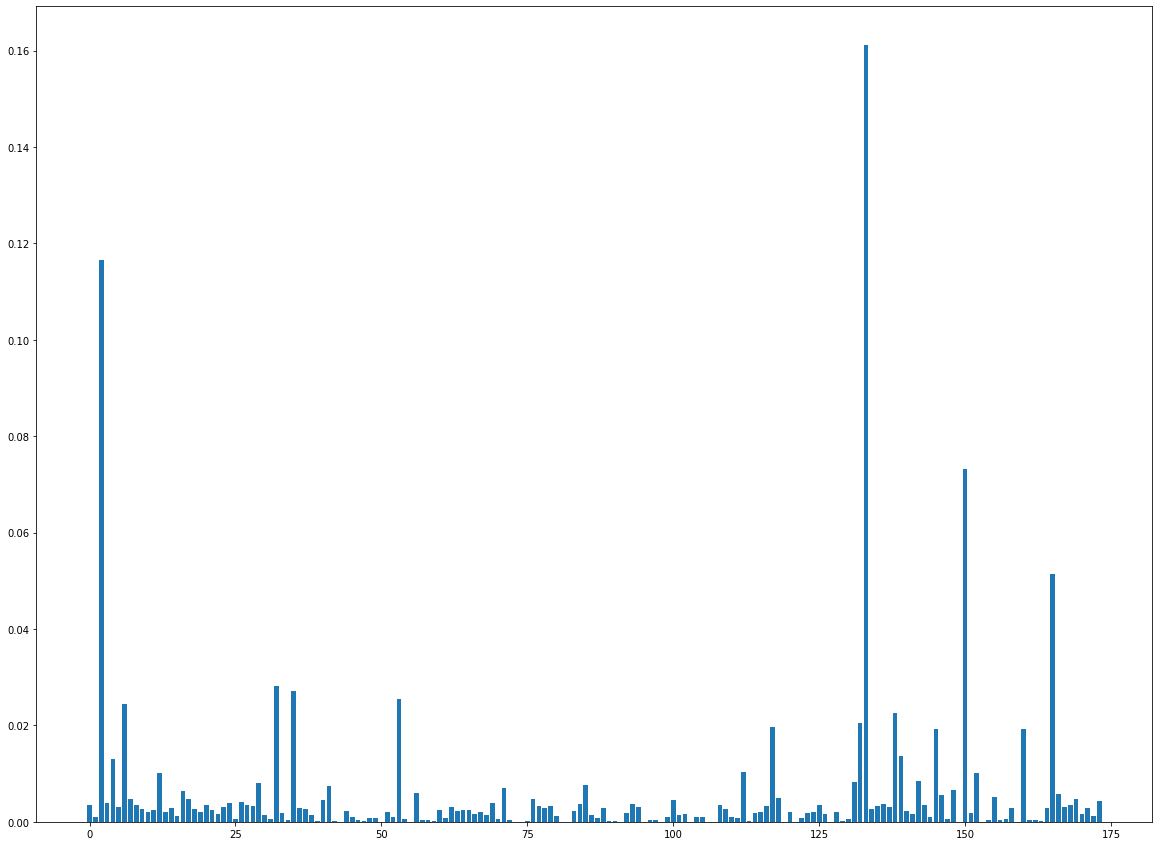

In [12]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)

print(model.feature_importances_)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [13]:
feat = model.feature_importances_
feat1 = sorted(feat, reverse = True)
print (feat1)

[0.1611249, 0.11661187, 0.07326824, 0.05135688, 0.028092166, 0.027135622, 0.025388964, 0.024393177, 0.02252152, 0.02049961, 0.019651072, 0.01928799, 0.019260917, 0.013741334, 0.013031075, 0.010413803, 0.010225329, 0.01007207, 0.008525665, 0.0082811685, 0.008026625, 0.0075672567, 0.007438237, 0.006950585, 0.006561851, 0.0063176807, 0.006062558, 0.0056644008, 0.0055732494, 0.0052057174, 0.0050106714, 0.004743654, 0.004691344, 0.004669717, 0.004650371, 0.0044487948, 0.0044362317, 0.0042295964, 0.004191622, 0.0039994516, 0.003837841, 0.0038237127, 0.0037510358, 0.0037049882, 0.0036797486, 0.0035562164, 0.0035509323, 0.0035012548, 0.003500658, 0.0034254948, 0.0033986021, 0.0033932289, 0.0033861422, 0.0033378387, 0.0033060417, 0.0032710705, 0.0032444594, 0.003236407, 0.0031486151, 0.0031480289, 0.0031426847, 0.0030958487, 0.0030102031, 0.0030089722, 0.002964432, 0.0028867822, 0.0028610856, 0.0028556231, 0.0028420053, 0.002838754, 0.0027600075, 0.002743457, 0.0027012934, 0.0026967698, 0.00267

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

[05:12:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


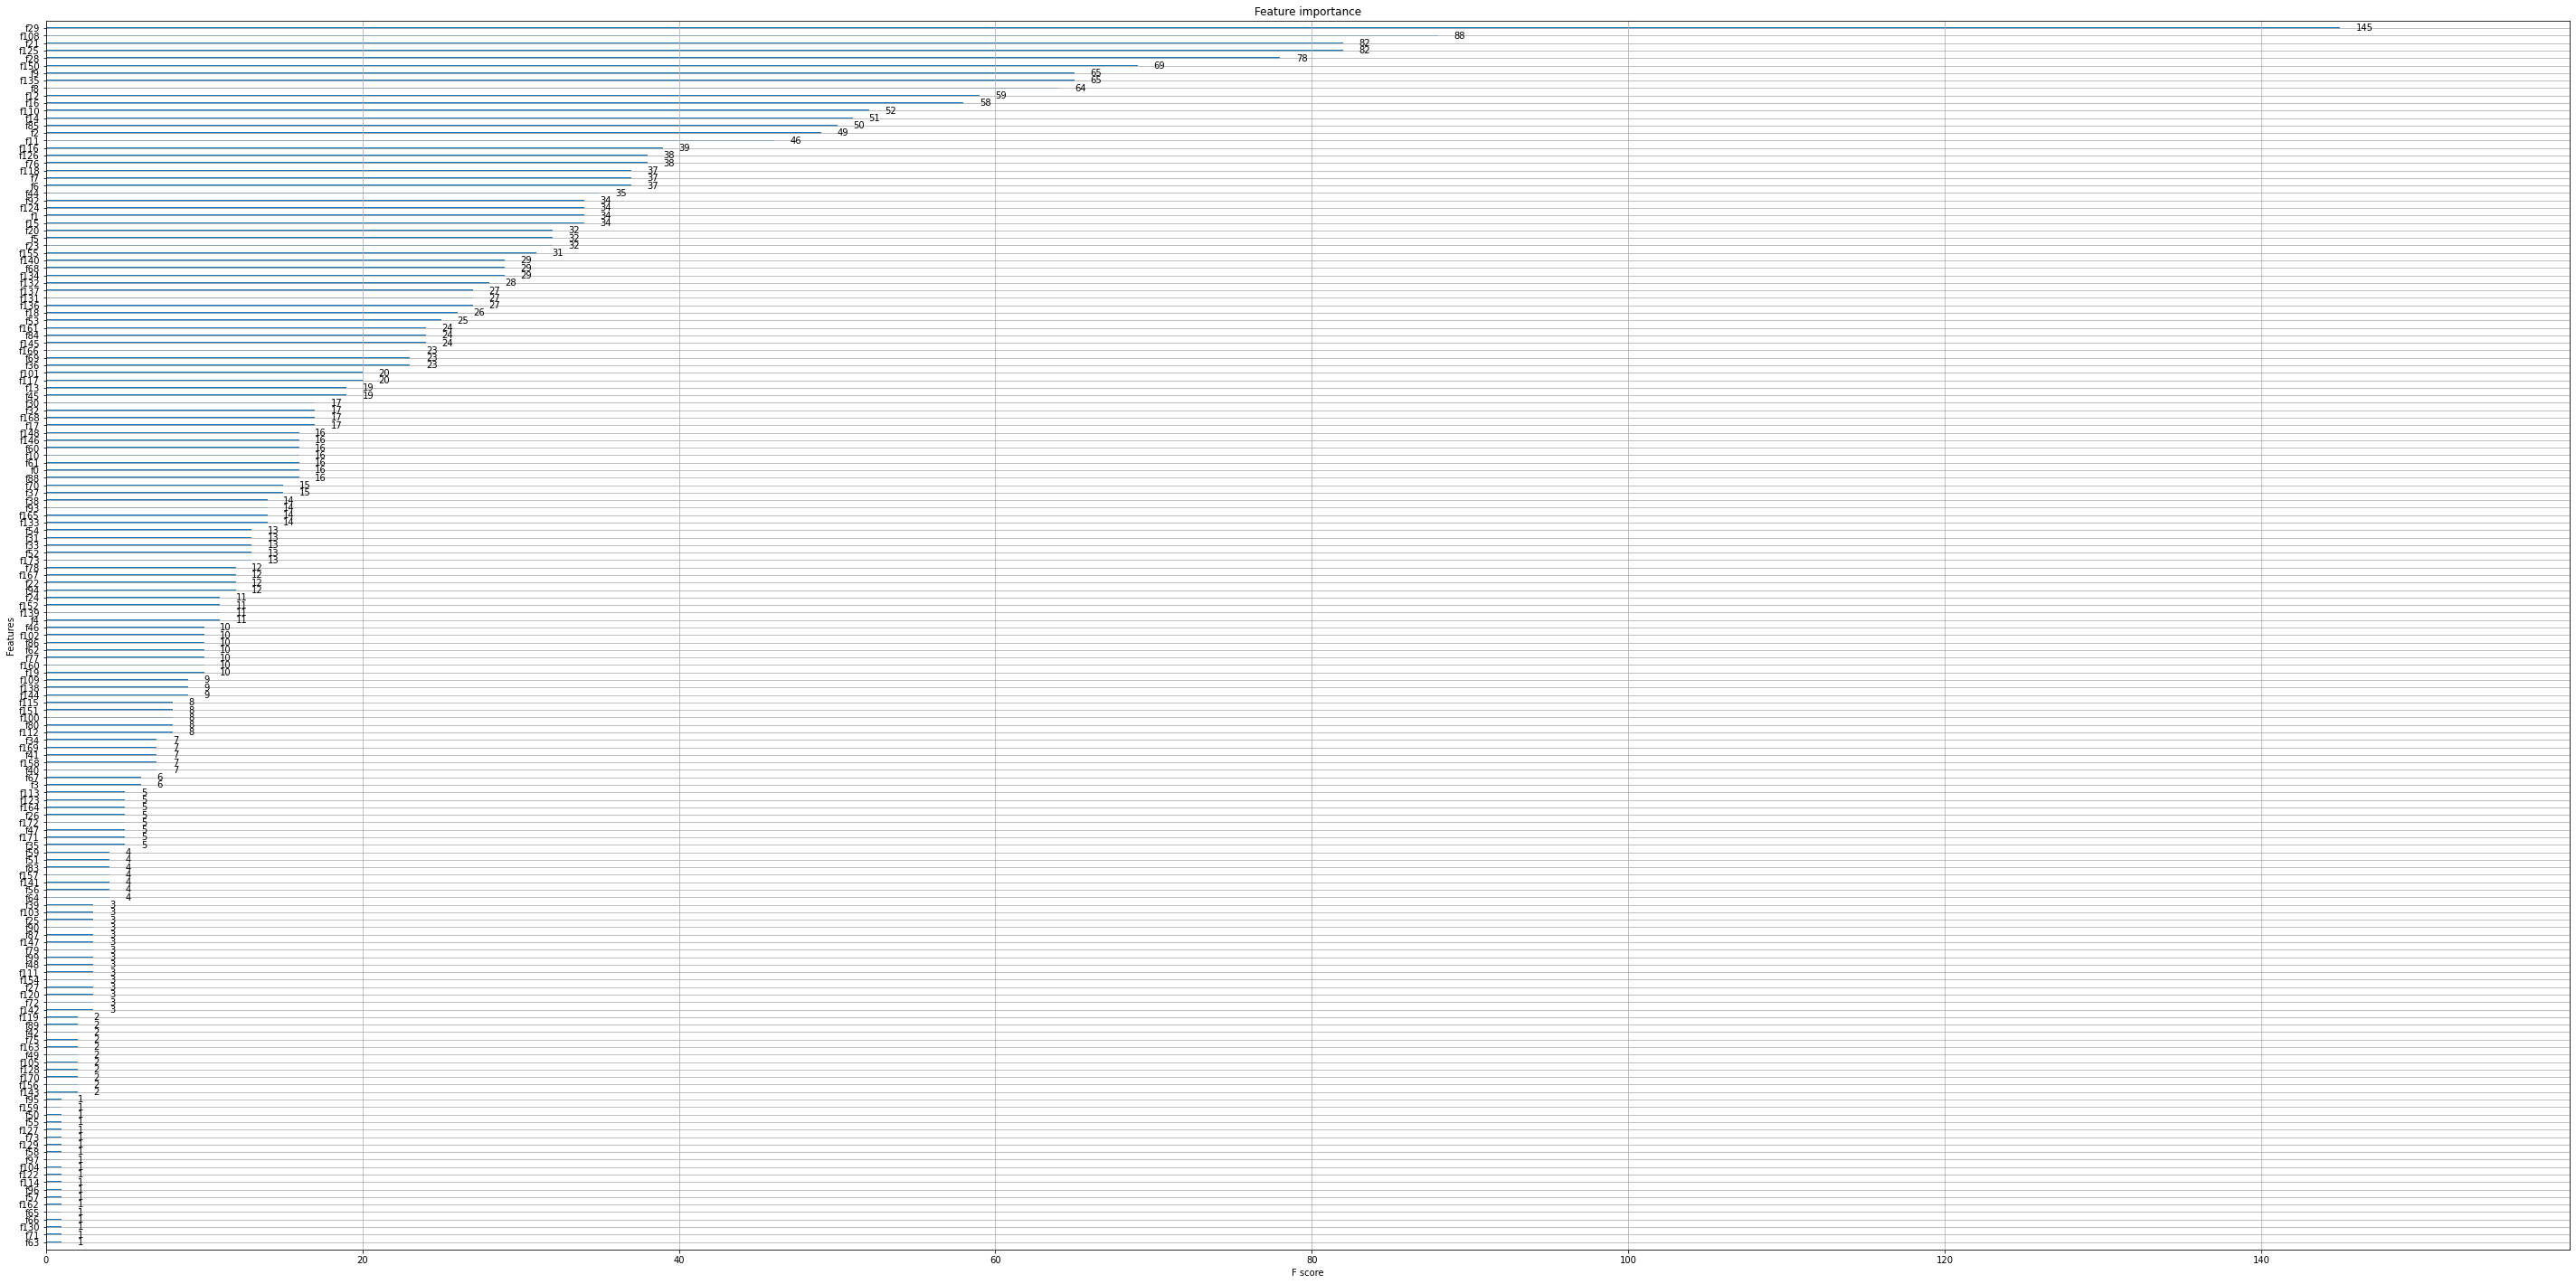

In [15]:
plt.rcParams['figure.figsize'] = [50, 25]

# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()

In [16]:
columns = ['Coeffiecient of Variation','Mean of Vertex to Vertex Slope','Variance of Vertex to Vertex Slope',
         'Hjorth_Activity','Hjorth_Mobility','Hjorth_Complexity',
         'Kurtosis','2nd Difference Mean','2nd Difference Max',
         'Skewness','1st Difference Mean','1st Difference Max',
         'FFT Delta MaxPower','FFT Theta MaxPower','FFT Alpha MaxPower','FFT Beta MaxPower','Delta/Theta','Delta/Alpha','Theta/Alpha','(Delta+Theta)/Alpha',
         '1Wavelet Approximate Mean','1Wavelet Approximate Std Deviation','1Wavelet Approximate Energy','1Wavelet Detailed Mean','1Wavelet Detailed Std Deviation','1Wavelet Detailed Energy','1Wavelet Approximate Entropy','1Wavelet Detailed Entropy',
         '2Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '3Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '4Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '5Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '6Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '7Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '8Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '9Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '10Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '11Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '12Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '13Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         '14Wavelet Approximate Mean','Wavelet Approximate Std Deviation','Wavelet Approximate Energy','Wavelet Detailed Mean','Wavelet Detailed Std Deviation','Wavelet Detailed Energy','Wavelet Approximate Entropy','Wavelet Detailed Entropy',
         'AR1','AR2','AR3','AR4','AR5','AR6','AR7','AR8','AR9','AR10','AR11','AR12','AR13','AR14','AR15','AR16','AR17','AR18',
         'AR19','AR20','AR21','AR22','AR23','AR24','AR25','AR26','AR27','AR28','AR29','AR30','AR31','AR32','AR33','AR34','AR35','AR36','AR37','AR38','AR39','AR40','AR41','AR42']


In [17]:
feat_num = [2, 29, 21, 150, 12, 136, 108, 135, 132, 9, 116, 125, 131, 85, 7, 16, 118, 11, 140, 6]
for  i in feat_num:
    print(columns[i])

Variance of Vertex to Vertex Slope
Wavelet Approximate Std Deviation
1Wavelet Approximate Std Deviation
AR19
FFT Delta MaxPower
AR5
12Wavelet Approximate Mean
AR4
AR1
Skewness
13Wavelet Approximate Mean
Wavelet Approximate Std Deviation
Wavelet Detailed Entropy
Wavelet Approximate Std Deviation
2nd Difference Mean
Delta/Theta
Wavelet Approximate Energy
1st Difference Max
AR9
Kurtosis


In [18]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [19]:
model = XGBClassifier(max_depth = 3,n_estimators=5)
model.fit(X_train, y_train)

[05:12:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 90.80997%


In [21]:
feat_importances = pd.Series(model.feature_importances_, index=columns)

In [22]:
thresholds = sorted(model.feature_importances_, reverse = True)

In [23]:
acc=[]
n=[]
for thresh in thresholds[:20]:
    # features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    n=n +([select_X_train.shape[1]])
    acc=acc+ [(accuracy*100.0)]

[05:12:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.169, n=1, Accuracy: 72.74%
[05:12:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.103, n=2, Accuracy: 85.05%
[05:12:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.100, n=3, Accuracy: 87.85%
[05:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.058, n=4, Accuracy: 87.69%
[05:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.055, n=5, Accuracy: 86.60%
[05:12:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.050, n=6, Accuracy: 87.38%
[05:12:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.047, n=7, Accuracy: 87.54%
[05:12:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.042, n=8, Accuracy: 89.56%
[05:12:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.042, n=9, Accuracy: 90.50%
[05:12:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.039, n=10, Accuracy: 89.88%
[05:12:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.033, n=11, Accuracy: 90.34%
[05:12:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.032, n=12, Accuracy: 90.81%
[05:12:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.030, n=13, Accuracy: 89.41%
[05:12:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.026, n=14, Accuracy: 90.03%
[05:12:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.022, n=15, Accuracy: 91.74%
[05:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.022, n=16, Accuracy: 91.12%
[05:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.017, n=17, Accuracy: 91.59%
[05:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.014, n=18, Accuracy: 91.43%
[05:12:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.012, n=19, Accuracy: 92.68%
[05:12:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.011, n=20, Accuracy: 92.06%


In [24]:
acc

[72.74143302180686,
 85.04672897196261,
 87.85046728971963,
 87.69470404984425,
 86.6043613707165,
 87.38317757009347,
 87.53894080996885,
 89.56386292834891,
 90.49844236760126,
 89.8753894080997,
 90.34267912772586,
 90.80996884735202,
 89.40809968847351,
 90.03115264797508,
 91.74454828660437,
 91.1214953271028,
 91.58878504672897,
 91.43302180685359,
 92.6791277258567,
 92.05607476635514]

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

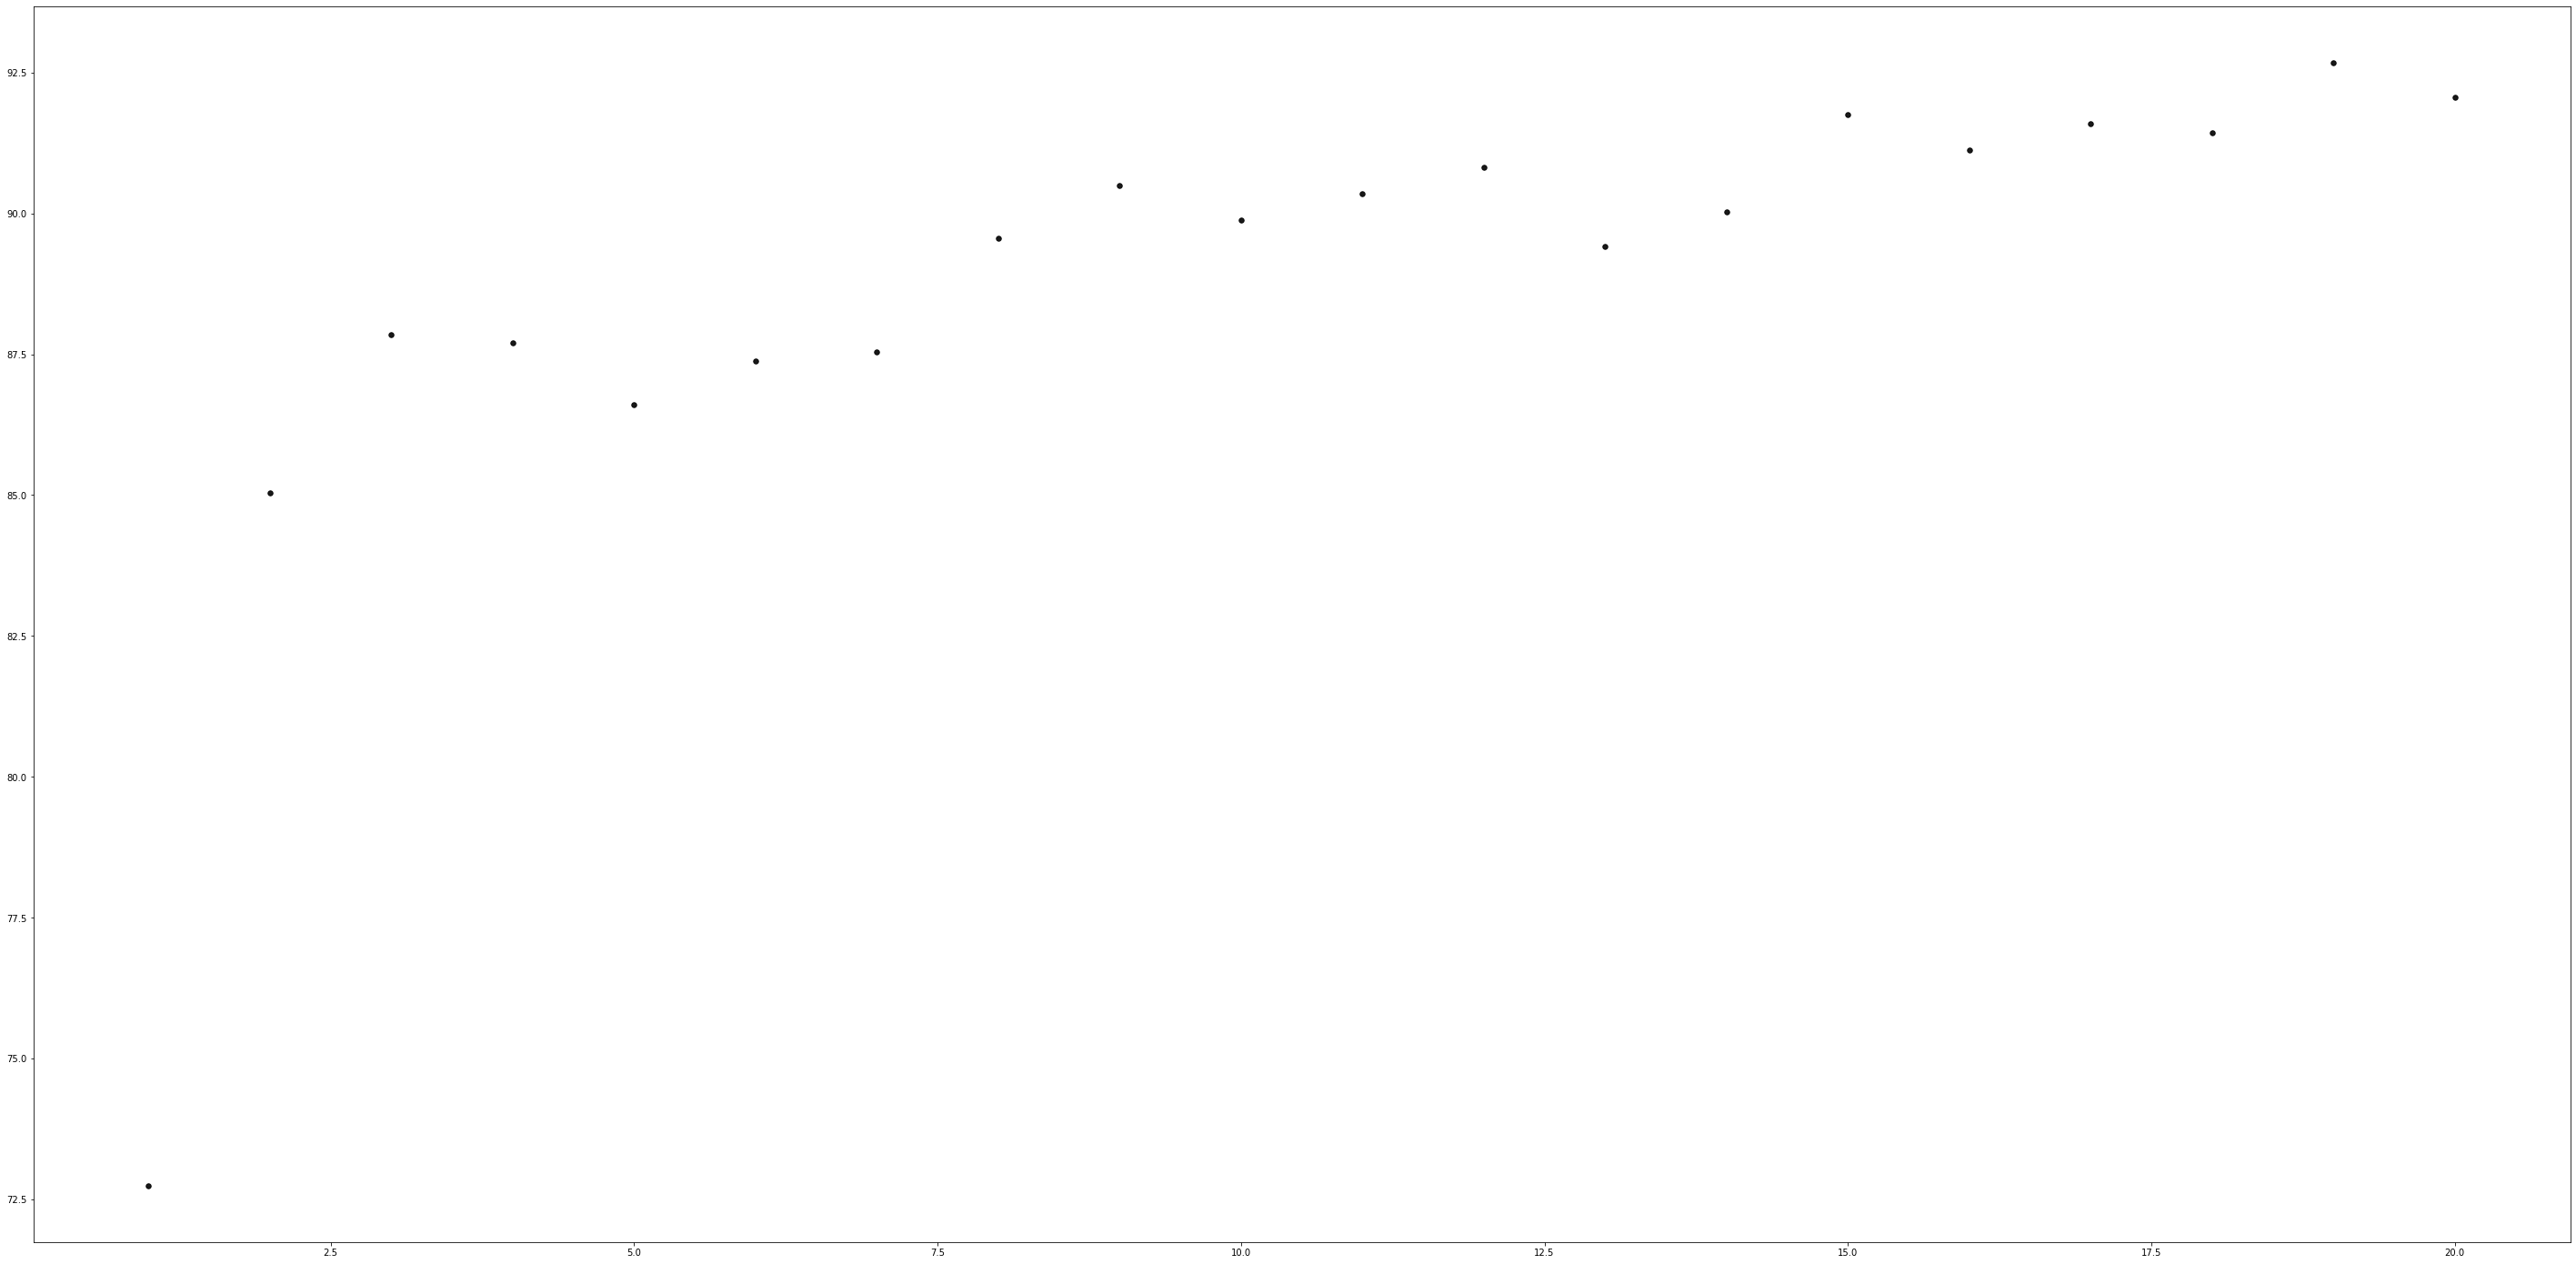

In [26]:
plt.figure(1)
plt.scatter((n),acc,c='black', s=30,alpha=.9)

In [27]:
#2 - XGBoost Classifier
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [28]:
start = time.time()

In [29]:
model = XGBClassifier(max_depth = 3, n_estimators = 5)
model.fit(X_train, y_train)

[05:12:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
# predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))
end= time.time()
print("Time taken=", end-start)
print (confusion_matrix(y_test, y_pred))

Accuracy: 90.80997%
Time taken= 0.08318328857421875
[[ 93   4   7]
 [  0 194  35]
 [  0  13 296]]


In [31]:
feat_importances.sort_values(ascending =False).head(50)

AR2                                   0.169325
Variance of Vertex to Vertex Slope    0.103328
AR19                                  0.099664
AR14                                  0.058144
Wavelet Detailed Std Deviation        0.055164
AR34                                  0.049941
Wavelet Approximate Std Deviation     0.046665
Hjorth_Mobility                       0.041773
Wavelet Approximate Std Deviation     0.041757
AR1                                   0.038555
AR41                                  0.033114
AR17                                  0.032188
Kurtosis                              0.030132
AR7                                   0.026339
Wavelet Approximate Std Deviation     0.021917
AR29                                  0.021634
AR35                                  0.016660
Delta/Alpha                           0.014380
Wavelet Detailed Entropy              0.012118
AR6                                   0.011218
Delta/Theta                           0.010619
AR8          

In [32]:
#3-SVM
print('#3-SVM')
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

kernels = ('poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    start =time.time()
    model = svm.SVC(kernel=kernel, C = .1)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("Accuracy with {} kernel = {}".format(kernel,acc))
    end=time.time()
    print("Time taken=",end-start)


#3-SVM
Accuracy with poly kernel = 74.76635514018692
Time taken= 0.38604092597961426
Accuracy with rbf kernel = 82.24299065420561
Time taken= 0.4559590816497803


In [33]:
print('#4-MLP')
start=time.time()
model = MLPClassifier(hidden_layer_sizes=(3,3,3,5), random_state=1, alpha = .1)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
end=time.time()
print("Time taken=",end-start)
print (confusion_matrix(y_test, y_test_pred))

#4-MLP
0.8473520249221184
Time taken= 1.4393422603607178
[[ 99   1   4]
 [  3 218   8]
 [  0  82 227]]


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       104
         2.0       0.72      0.95      0.82       229
         3.0       0.95      0.73      0.83       309

    accuracy                           0.85       642
   macro avg       0.88      0.88      0.87       642
weighted avg       0.87      0.85      0.85       642



In [35]:
from sklearn.metrics import roc_curve, auc

In [36]:
#5-DecisionTree
print('#5-DecisionTree')
start=time.time()
model = tree.DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time taken=",end-start)

#5-DecisionTree
Time taken= 0.07109785079956055


In [37]:
#7-GaussianNB
print('#7-GaussianNB')
start=time.time()
model = GaussianNB()
model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time taken=",end-start)

#7-GaussianNB
Time taken= 0.007495880126953125


In [38]:
import pandas as pd
import numpy as np
import random

[0.01192559 0.00232061 0.00985369 0.01305337 0.00345995 0.00513299
 0.00330557 0.0058046  0.00283271 0.00415846 0.00587221 0.00702341
 0.0068771  0.00302061 0.00518771 0.00379648 0.00657988 0.00455333
 0.00248384 0.00299326 0.00326063 0.01511462 0.00334408 0.00195609
 0.00510287 0.0096115  0.00956074 0.00319398 0.00553348 0.01312307
 0.00398681 0.00188183 0.00718493 0.00693918 0.0139143  0.00471234
 0.00287905 0.0106028  0.00234022 0.00142266 0.00682241 0.01202349
 0.00354898 0.00309707 0.0035118  0.00470041 0.00357322 0.00203646
 0.00158148 0.00675313 0.00333633 0.00289369 0.00350035 0.00735064
 0.0024285  0.00159282 0.00884136 0.00641899 0.00781447 0.00254777
 0.00369704 0.00875882 0.00270725 0.0020289  0.00604517 0.00642403
 0.00152161 0.00245146 0.00255999 0.00709673 0.00242    0.00244486
 0.01038362 0.005144   0.00465251 0.0025491  0.00316413 0.00820837
 0.00312119 0.00217944 0.00451735 0.00506615 0.01118836 0.00334869
 0.00309825 0.00987724 0.00308762 0.00158328 0.00272585 0.0052

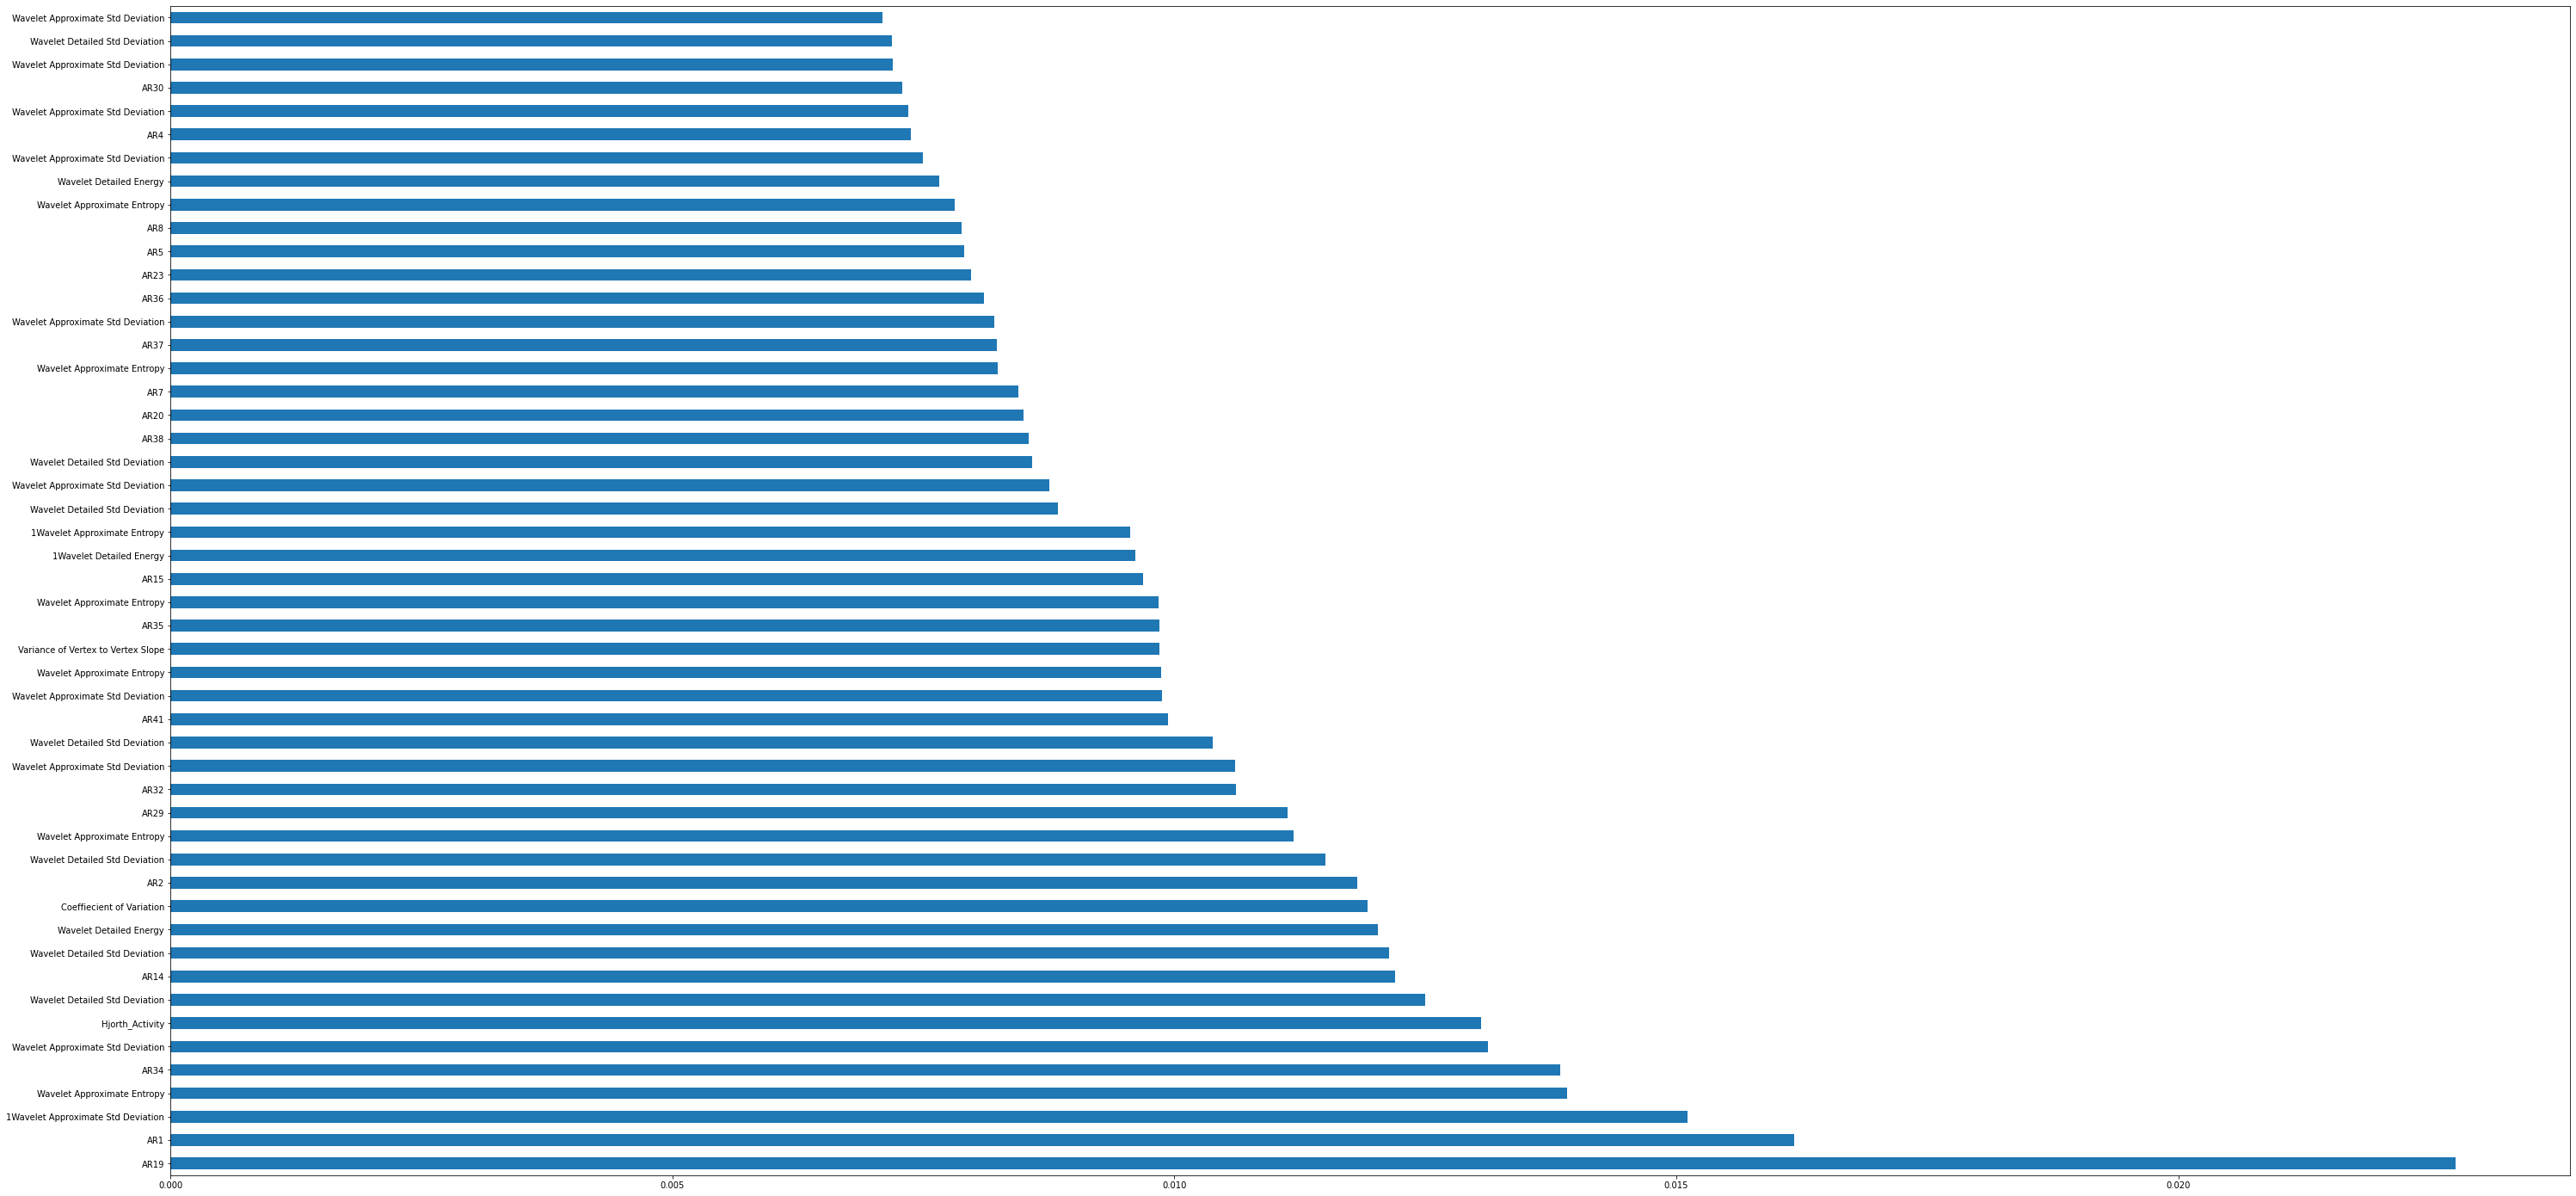

In [39]:
random.seed(5)   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
#inbuilt class use for feature_importances of tree based classifiers
print(model.feature_importances_)
y_test_pred = model.predict(X_test)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [40]:
feat_importances.sort_values(ascending =False).head(50)

AR19                                  0.022764
AR1                                   0.016170
1Wavelet Approximate Std Deviation    0.015115
Wavelet Approximate Entropy           0.013914
AR34                                  0.013842
Wavelet Approximate Std Deviation     0.013123
Hjorth_Activity                       0.013053
Wavelet Detailed Std Deviation        0.012496
AR14                                  0.012203
Wavelet Detailed Std Deviation        0.012139
Wavelet Detailed Energy               0.012023
Coeffiecient of Variation             0.011926
AR2                                   0.011822
Wavelet Detailed Std Deviation        0.011503
Wavelet Approximate Entropy           0.011188
AR29                                  0.011129
AR32                                  0.010617
Wavelet Approximate Std Deviation     0.010603
Wavelet Detailed Std Deviation        0.010384
AR41                                  0.009941
Wavelet Approximate Std Deviation     0.009877
Wavelet Appro

In [41]:
print (X.shape)
len(columns)
data = pd.read_csv('Downloads/Normalizedfeatures.csv', index_col = False)
print (data.head())
# len(data)
print (type(data))

(2568, 174)
   Coeffiecient of Variation  Mean of Vertex to Vertex Slope  \
0                  -1.125669                        0.022049   
1                  -1.100552                        0.036434   
2                  -1.049774                       -0.013238   
3                  -0.958845                       -0.027342   
4                  -0.916390                       -0.052836   

   Variance of Vertex to Vertex Slope  Hjorth_Activity  Hjorth_Mobility  \
0                           -0.776677        -0.923657        -0.627412   
1                           -0.776932        -0.903380        -0.651750   
2                           -0.776870        -0.852932        -0.665254   
3                           -0.776959        -0.815391        -0.902324   
4                           -0.775672        -0.821596        -0.892699   

   Hjorth_Complexity  Kurtosis  2nd Difference Mean  2nd Difference Max  \
0           0.085673  0.283751            -0.887253           -0.839178   
1 

In [42]:
data.head()

,Coeffiecient of Variation,Mean of Vertex to Vertex Slope,Variance of Vertex to Vertex Slope,Hjorth_Activity,Hjorth_Mobility,Hjorth_Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Skewness,...,AR34,AR35,AR36,AR37,AR38,AR39,AR40,AR41,AR42,y
0,-1.125669,0.022049,-0.776677,-0.923657,-0.627412,0.085673,0.283751,-0.887253,-0.839178,0.214306,...,0.046138,0.172939,-0.234142,-0.118177,0.764333,-1.825703,-1.054078,1.799067,-0.218968,1
1,-1.100552,0.036434,-0.776932,-0.903380,-0.651750,0.266421,0.533136,-0.887701,-0.842542,0.612276,...,0.021503,-0.156163,0.103820,-0.084176,0.572223,-1.380737,-1.229272,1.543474,0.459338,1
2,-1.049774,-0.013238,-0.776870,-0.852932,-0.665254,0.452051,0.941036,-0.885473,-0.828246,-0.083744,...,-0.202683,-0.048021,0.385387,-0.480042,0.552907,-0.057010,-1.836184,1.609308,1.583392,1
3,-0.958845,-0.027342,-0.776959,-0.815391,-0.902324,0.781778,0.622623,-0.883749,-0.821521,-0.684864,...,-1.614062,0.638445,2.152921,-1.331875,0.613414,2.497135,-2.514157,1.944259,2.502220,1
4,-0.916390,-0.052836,-0.775672,-0.821596,-0.892699,0.739742,0.417912,-0.875548,-0.832451,0.018091,...,-1.434351,1.419284,1.146093,-1.963672,1.131366,3.027593,-2.356202,2.598594,1.344457,1


<class 'pandas.core.series.Series'>
y                                       1.000000
Wavelet Approximate Entropy.11          0.595006
Wavelet Approximate Entropy.5           0.595002
Wavelet Approximate Entropy.6           0.594922
Wavelet Approximate Entropy.3           0.594837
1Wavelet Approximate Entropy            0.594809
Hjorth_Activity                         0.594792
Wavelet Approximate Entropy.1           0.594705
Wavelet Approximate Entropy.2           0.594666
Wavelet Approximate Entropy.4           0.594509
Wavelet Approximate Entropy.12          0.594386
Wavelet Approximate Entropy.8           0.594166
Wavelet Approximate Entropy.7           0.594151
Wavelet Approximate Entropy.10          0.593408
Wavelet Approximate Entropy.9           0.593302
Variance of Vertex to Vertex Slope      0.589378
Wavelet Approximate Entropy             0.587520
Wavelet Detailed Energy.11              0.579441
Wavelet Detailed Energy.6               0.579348
Wavelet Detailed Energy.5        

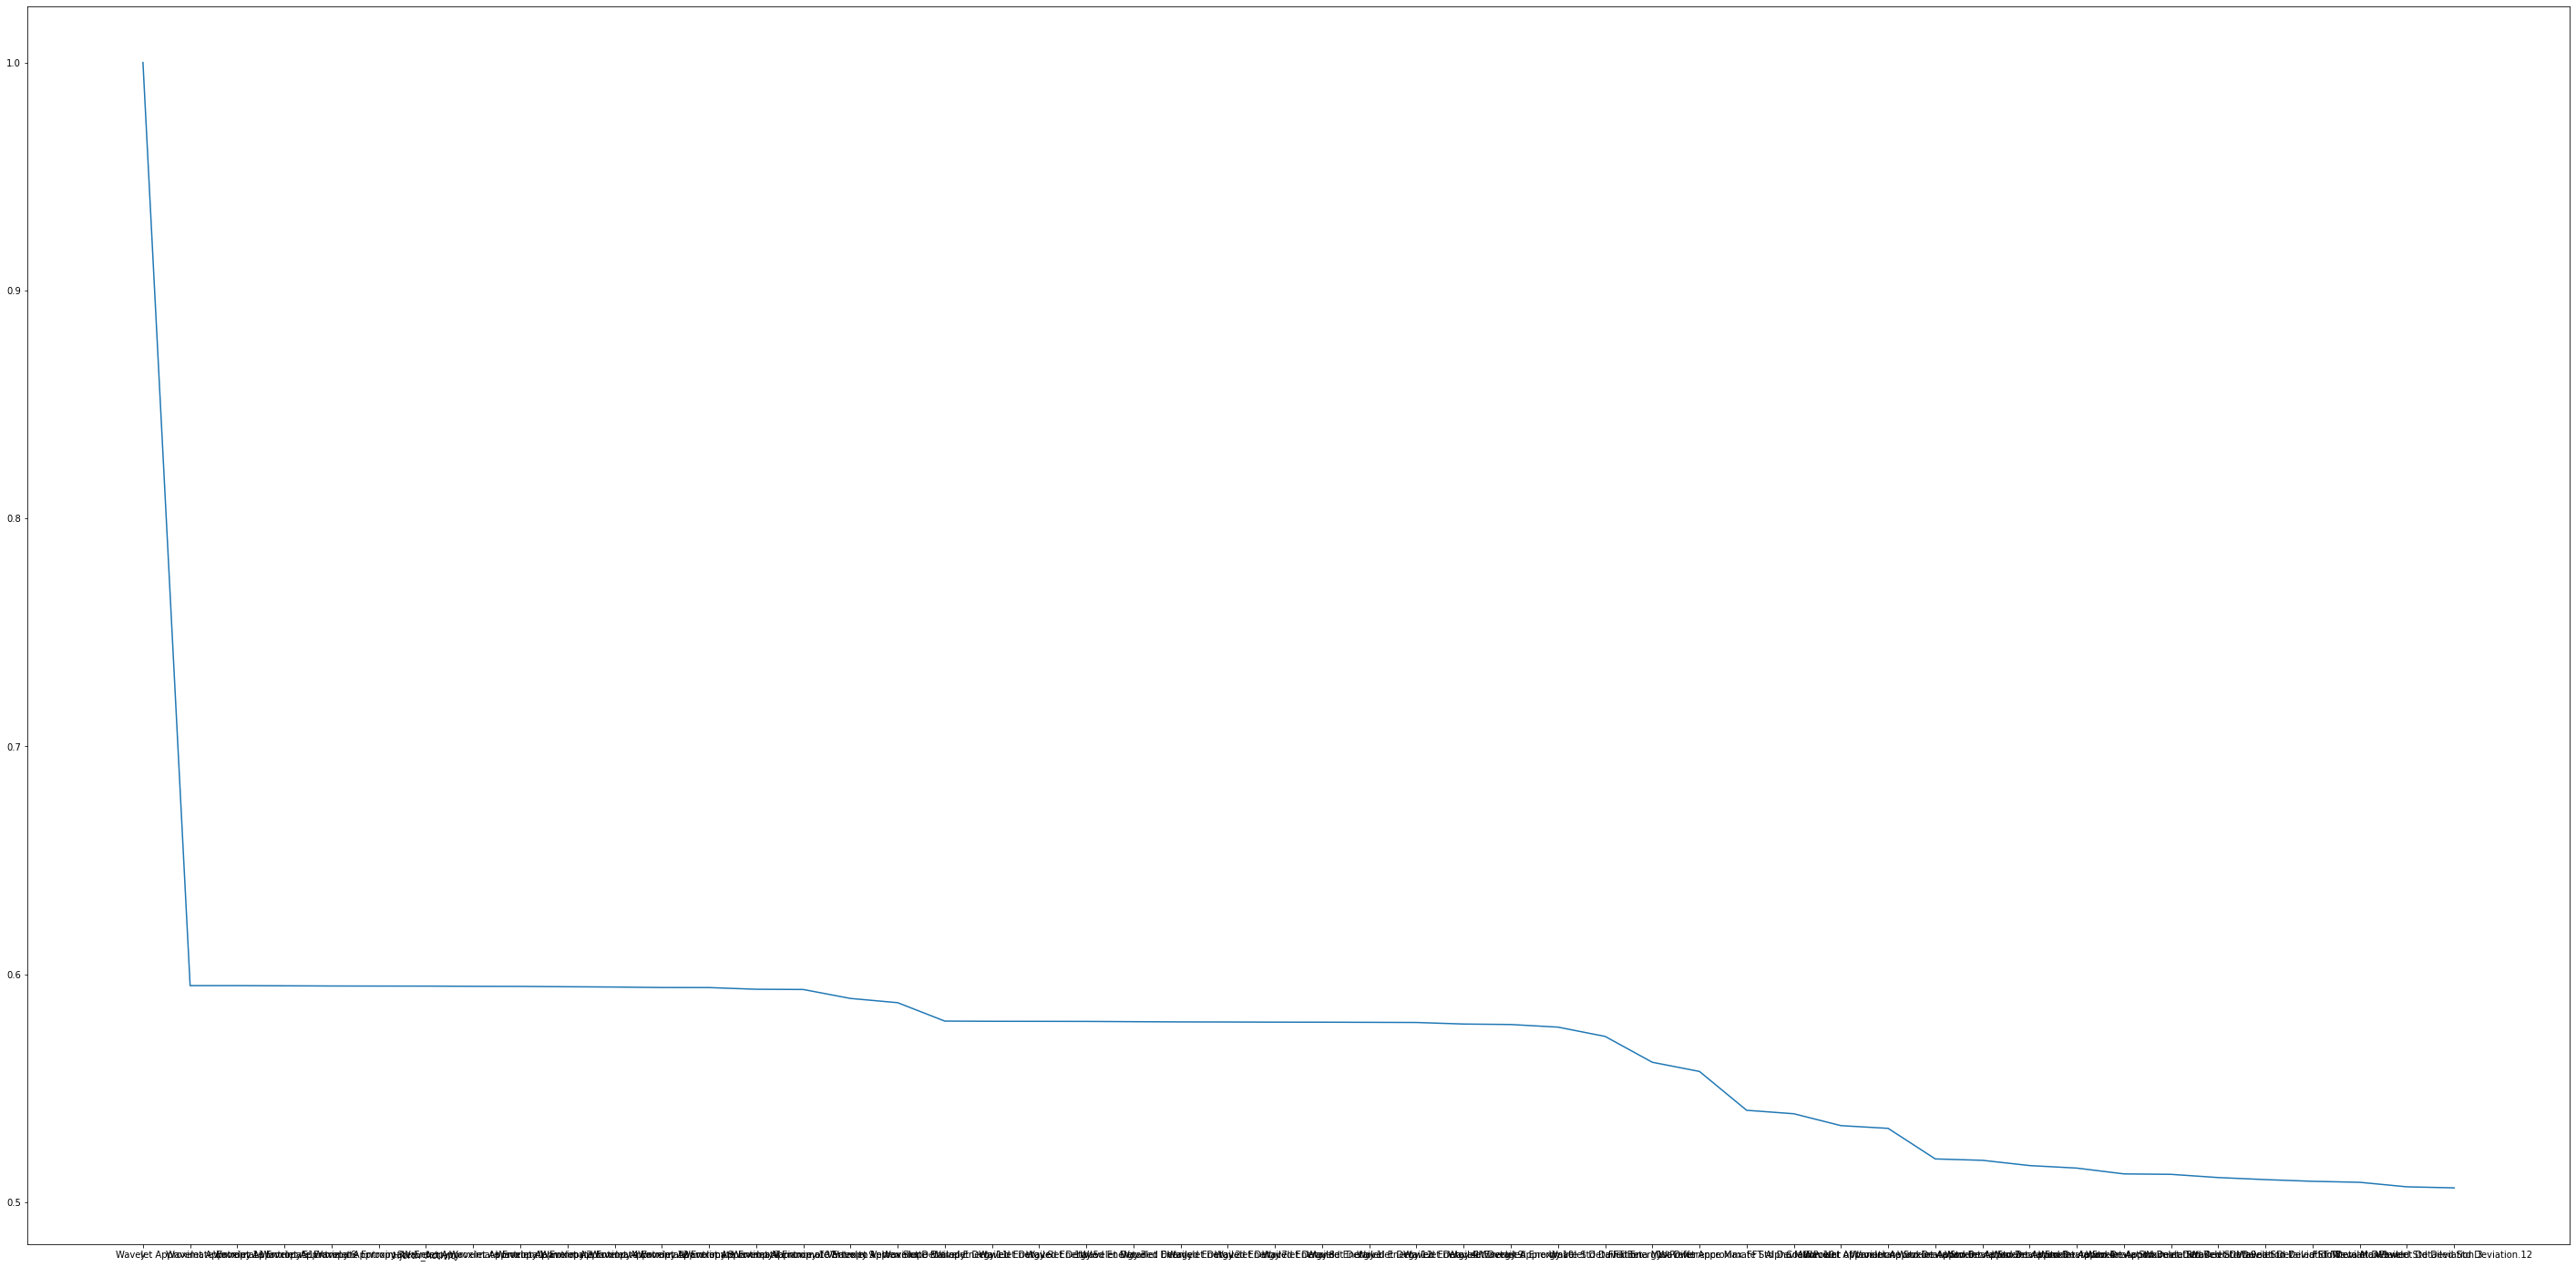

In [43]:
corrmat = data.corr()
top_corr_features = corrmat.index
y_corr = corrmat.iloc[:,-1]
print (type(y_corr))
y_corr1 = y_corr.abs().sort_values(ascending = False).head(50)
print (y_corr1)
plt.plot(y_corr1)


In [44]:
#get_ipython().system('pip install -U scikit-learn==0.21.3')

%pip install -U scikit-learn==0.23.1

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [47]:
len(sel.get_support())

174

In [48]:
X_train1 = pd.DataFrame(X_train, columns = columns)
X_train1.head()

,Coeffiecient of Variation,Mean of Vertex to Vertex Slope,Variance of Vertex to Vertex Slope,Hjorth_Activity,Hjorth_Mobility,Hjorth_Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Skewness,...,AR33,AR34,AR35,AR36,AR37,AR38,AR39,AR40,AR41,AR42
0,-0.693161,-0.068365,-0.771978,-0.707095,-0.975094,1.626437,-0.132000,-0.843914,-0.791670,-0.957866,...,0.707896,-0.877303,0.205388,1.297517,-1.183231,1.274003,0.116438,-1.005051,0.598647,1.230175
1,0.875386,-0.734078,0.608189,0.633262,1.079270,-1.006055,-1.077336,0.841293,0.891360,0.109937,...,0.102988,-0.705522,-0.303285,1.466003,1.008641,-1.335198,0.619162,0.970631,-1.377755,-0.157751
2,-0.787388,0.122321,-0.771022,-0.799116,-1.038804,1.138207,0.971666,-0.837658,-0.781997,3.314914,...,0.883476,1.797752,-1.211904,-1.947948,-0.040951,0.049045,-0.010808,0.320917,-0.583939,0.112850
3,-0.847055,0.021003,-0.758145,-0.765502,-0.694882,0.158399,1.525232,-0.797607,-0.914436,-1.301110,...,-0.209349,1.527740,-1.019338,-1.664935,-0.086110,0.114522,-0.054930,0.016201,0.148507,-0.223984
4,0.952005,0.683312,0.686915,0.741610,1.074591,-1.027110,-1.352338,0.972972,0.851376,-0.345139,...,-0.203517,-1.066111,0.684693,1.186010,0.741282,-0.893730,0.202901,0.695095,-0.748958,-0.419068


In [49]:
X_train1.columns

Index(['Coeffiecient of Variation', 'Mean of Vertex to Vertex Slope',
       'Variance of Vertex to Vertex Slope', 'Hjorth_Activity',
       'Hjorth_Mobility', 'Hjorth_Complexity', 'Kurtosis',
       '2nd Difference Mean', '2nd Difference Max', 'Skewness',
       ...
       'AR33', 'AR34', 'AR35', 'AR36', 'AR37', 'AR38', 'AR39', 'AR40', 'AR41',
       'AR42'],
      dtype='object', length=174)

In [50]:
selected_feat= X_train1.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat[:11])

58
Index(['Coeffiecient of Variation', 'Variance of Vertex to Vertex Slope',
       'Hjorth_Activity', '2nd Difference Mean', '1st Difference Mean',
       '1st Difference Max', 'FFT Delta MaxPower', 'Delta/Theta',
       '1Wavelet Approximate Std Deviation', '1Wavelet Detailed Std Deviation',
       'Wavelet Approximate Std Deviation'],
      dtype='object')


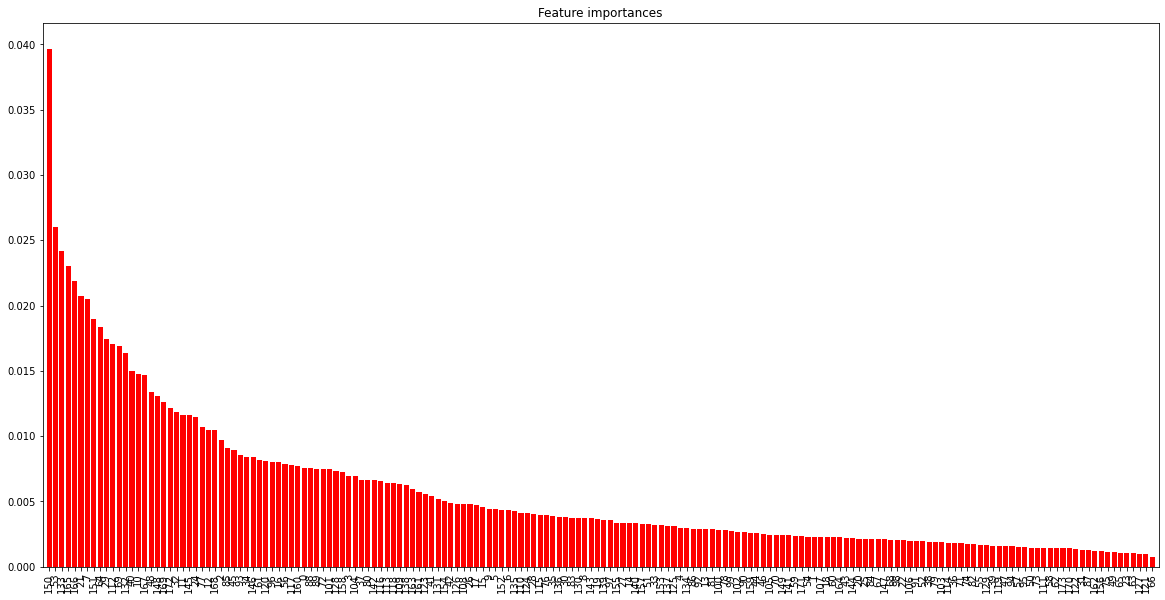

In [51]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices,rotation=90)
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [52]:
print (importances[indices])

[0.03965032 0.02600306 0.02414464 0.0230615  0.02188231 0.02070351
 0.020501   0.01896934 0.01836077 0.01740154 0.01704311 0.01689701
 0.01636926 0.01500468 0.01472747 0.01464516 0.0133944  0.01308402
 0.01261573 0.01216674 0.01182243 0.01163881 0.01160382 0.01146643
 0.01069177 0.01047349 0.01044083 0.00967781 0.00910405 0.00891913
 0.00857431 0.00841706 0.0083899  0.00818904 0.00806923 0.00801693
 0.00799987 0.00789105 0.00775964 0.00772779 0.00756313 0.00752591
 0.0074843  0.00746962 0.00744243 0.00735724 0.00725642 0.00692487
 0.00691338 0.00667632 0.00661728 0.00661041 0.00655493 0.00639752
 0.00639493 0.00629465 0.00623337 0.00594238 0.00574352 0.00553063
 0.00538872 0.00521118 0.00505995 0.00490716 0.00483436 0.00482822
 0.0048047  0.00474338 0.00459028 0.00440819 0.00439195 0.00434906
 0.00433207 0.00424947 0.00411218 0.00410491 0.00401478 0.00393417
 0.00393408 0.00385663 0.0038242  0.00380191 0.00371513 0.00371111
 0.00370934 0.00369012 0.00364867 0.00355777 0.0035391  0.0033

In [53]:
optimized_features = ['Kurtosis', 'Hjorth_Mobility','1Wavelet Detailed Std Deviation', 'Variance of Vertex to Vertex Slope',
                      '1Wavelet Approximate Std Deviation', 'Delta/Theta', 'Coeffiecient of Variation', 'Delta/Alpha',
                      'FFT Alpha MaxPower', '1st Difference Max', '1Wavelet Approximate Energy', '1Wavelet Detailed Energy',
                      'FFT Beta MaxPower', '1Wavelet Approximate Entropy']

In [54]:
X_train1 = pd.DataFrame(X_train, columns = columns)
X_train1
X_train2 = X_train1[optimized_features]
X_train2.head()

,Kurtosis,Hjorth_Mobility,1Wavelet Detailed Std Deviation,Variance of Vertex to Vertex Slope,1Wavelet Approximate Std Deviation,Delta/Theta,Coeffiecient of Variation,Delta/Alpha,FFT Alpha MaxPower,1st Difference Max,1Wavelet Approximate Energy,1Wavelet Detailed Energy,FFT Beta MaxPower,1Wavelet Approximate Entropy
0,-0.132000,-0.975094,-0.835999,-0.771978,-0.729193,0.017465,-0.693161,0.235826,-0.721037,-0.842674,0.132308,-0.768000,-0.755593,-0.748110
1,-1.077336,1.079270,0.868634,0.608189,0.913950,-0.699487,0.875386,-0.712799,1.316568,0.706519,0.044559,0.579529,0.601332,0.504652
2,0.971666,-1.038804,-0.832686,-0.771022,-1.082856,1.203106,-0.787388,1.388798,-0.739327,-0.826893,0.094568,-0.767708,-0.763417,-0.748004
3,1.525232,-0.694882,-0.830701,-0.758145,-0.860311,-0.104903,-0.847055,0.385197,-0.706382,-0.762435,0.061594,-0.767527,-0.720595,-0.747902
4,-1.352338,1.074591,0.946718,0.686915,1.029657,-0.225135,0.952005,-0.659158,0.615795,0.784307,0.103290,0.694932,0.576008,0.627135


In [55]:
X_test1 = pd.DataFrame(X_test, columns = columns)
X_test2 = X_test1[optimized_features]
X_test2

,Kurtosis,Hjorth_Mobility,1Wavelet Detailed Std Deviation,Variance of Vertex to Vertex Slope,1Wavelet Approximate Std Deviation,Delta/Theta,Coeffiecient of Variation,Delta/Alpha,FFT Alpha MaxPower,1st Difference Max,1Wavelet Approximate Energy,1Wavelet Detailed Energy,FFT Beta MaxPower,1Wavelet Approximate Entropy
0,0.214134,-1.001184,-0.831399,-0.770594,-1.055412,2.038088,-0.723237,1.834969,-0.738361,-0.843681,0.085777,-0.767592,-0.764101,-0.747987
1,-1.226680,1.104229,0.909422,0.578182,0.776907,-0.735464,0.852961,-0.680692,0.109894,0.765674,0.145091,0.636094,0.608752,0.562422
2,0.470943,-0.750517,-0.848690,-0.768132,-0.543802,-0.504727,-0.970828,-0.401934,-0.693387,-0.825215,0.023115,-0.769035,-0.753226,-0.748528
3,0.340888,-1.024339,-0.829116,-0.766084,-0.478898,1.033827,-0.694051,0.436651,-0.681602,-0.760085,0.044472,-0.767383,-0.749688,-0.747787
4,-1.023095,1.142100,0.809409,0.480863,0.744541,-0.701924,0.731955,-0.732571,0.516273,0.608052,0.122969,0.490934,0.605053,0.414228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,-0.508965,1.178355,1.695640,2.035056,1.821975,-0.588551,1.749212,-0.727179,1.778517,1.912303,0.044626,2.085056,3.024573,2.142675
638,-1.251255,1.114728,0.841971,0.573209,0.968185,-0.722707,0.850714,-0.714284,0.527614,0.664118,0.180824,0.534689,1.048837,0.463271
639,0.445349,-0.408581,-0.811412,-0.767190,-1.023944,0.221573,-1.067522,-0.303845,-0.741435,-0.823872,0.079007,-0.765618,-0.761681,-0.747128
640,0.456110,-0.789048,-0.832949,-0.767415,-0.582623,0.007683,-0.879875,0.278758,-0.716271,-0.717449,0.117492,-0.767732,-0.758017,-0.747891


In [56]:
# Classification With Optimized features
#For KNN
print('#KNN')
start=time.time()
model = neighbors.KNeighborsClassifier(n_neighbors = 20)
# model.fit(X_train, y_train)
model.fit(X_train2, y_train)
y_test_pred = model.predict(X_test2)
# y_pred = model.predict(X)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
end=time.time()
print("Time taken=",end-start)

#KNN
0.7507788161993769
Time taken= 0.02757096290588379


In [57]:
#For XGBoost Classifier
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

start=time.time()

model = XGBClassifier(max_depth = 3, n_estimators = 5)
model.fit(X_train2, y_train)

[05:12:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
#To  make predictions for test data and evaluate
y_pred = model.predict(X_test2)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))
end=time.time()
print("Time taken=",end-start)
print (confusion_matrix(y_test, y_pred))

Accuracy: 82.39875%
Time taken= 0.03981804847717285
[[ 93   2   9]
 [  0 150  79]
 [  0  23 286]]


In [59]:
#SVM
print('#SVM')
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test2)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy



#SVM


In [60]:
kernels = ('poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    start=time.time()
    model = svm.SVC(kernel=kernel, C = .1)
    model.fit(X_train2, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    end=time.time()
    print("Time taken=",end-start)
    print("Accuracy with {} kernel = {}".format(kernel,acc))

Time taken= 0.05719709396362305
Accuracy with poly kernel = 66.51090342679127
Time taken= 0.07716703414916992
Accuracy with rbf kernel = 70.5607476635514


In [61]:
#MLP
start=time.time()
model = MLPClassifier(hidden_layer_sizes=(3,3,3,5), random_state=1, alpha = .1)
# model.fit(X_train, y_train)
model.fit(X_train2, y_train)

/Users/kaushikvegad/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=(3, 3, 3, 5), random_state=1)

In [62]:
y_test_pred = model.predict(X_test2)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
end=time.time()
print("Time taken=",end-start)
print (confusion_matrix(y_test, y_test_pred))

0.7180685358255452
Time taken= 1.1401500701904297
[[ 84   9  11]
 [  0 106 123]
 [  0  38 271]]


In [63]:
#DecisionTree
print('#DecisionTree')
start=time.time()
model = tree.DecisionTreeClassifier(max_depth = 4)
# model.fit(X_train, y_train)
model.fit(X_train2, y_train)
y_test_pred = model.predict(X_test2)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time consumed=",end-start)

#DecisionTree
Time consumed= 0.007937192916870117


In [64]:
#GaussianNB
print('#GaussianNB')
start=time.time()
model = GaussianNB()
model.fit(X_train2, y_train)
y_test_pred = model.predict(X_test2)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
end=time.time()
print("Time consumed=",end-start)

#GaussianNB
Time consumed= 0.004542827606201172


<ipython-input-65-2dce00b3cea6>:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='both')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


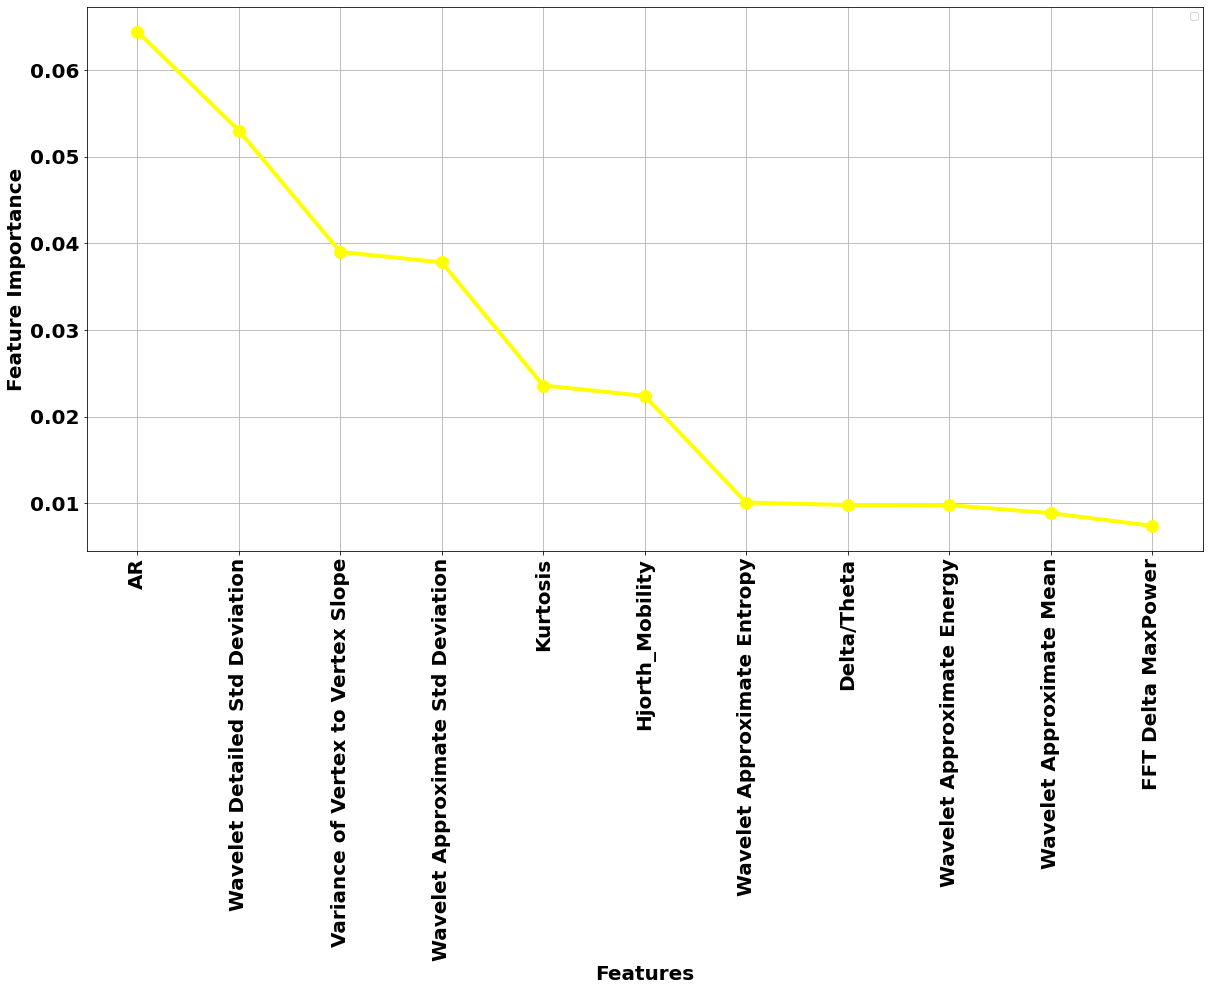

In [65]:
XGBoost_features = {'AR' : 0.0644,
                   'Wavelet Detailed Std Deviation' : [0.053],
                   'Variance of Vertex to Vertex Slope' : [0.039],
                   'Wavelet Approximate Std Deviation' : [0.0378],
                   'Kurtosis' : [0.0236],
                   'Hjorth_Mobility' : [0.0224],
                   'Wavelet Approximate Entropy' : [0.0101],
                   'Delta/Theta' : [0.00982],
                   'Wavelet Approximate Energy' : [0.009809],
                   'Wavelet Approximate Mean' : [0.00889],
                   'FFT Delta MaxPower' : [0.00742]}

XGBoost_df = pd.DataFrame(XGBoost_features)
# XGBoost_df
legend_prop = {'weight':'bold'}
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(XGBoost_df.columns,XGBoost_df.iloc[0], color='yellow', marker='o', linestyle='solid', linewidth=4, markersize=12)
plt.xticks(XGBoost_df.columns, rotation='vertical',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.ylabel("Feature Importance",fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize=20,fontweight='bold')
plt.grid(b=None, which='major', axis='both')
plt.legend(prop=legend_prop)
plt.show()



<ipython-input-66-6590fc635855>:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='both')


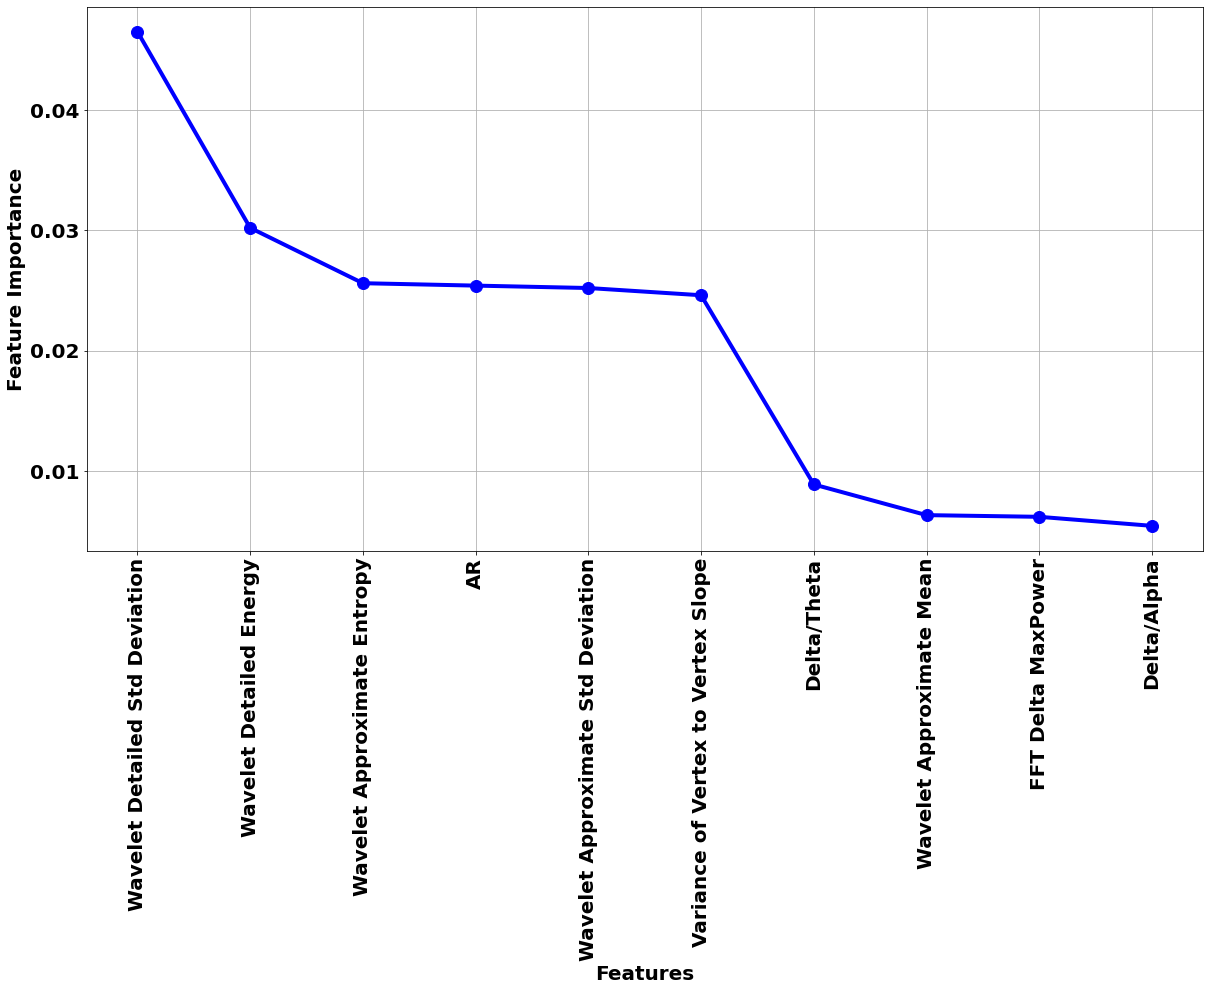

In [66]:
ETrees_features = {'Wavelet Detailed Std Deviation' : [0.0465],               
                   'Wavelet Detailed Energy' : [0.0302],
                   'Wavelet Approximate Entropy' : [0.0256],                  
                   'AR' : [0.0254],
                   'Wavelet Approximate Std Deviation' : [0.0252],
                   'Variance of Vertex to Vertex Slope' : [0.0246],
                   'Delta/Theta' : [0.00888],
                   'Wavelet Approximate Mean' : [0.00633],
                   'FFT Delta MaxPower' : [0.00619],
                   'Delta/Alpha' : [0.00544]}

ETrees_df = pd.DataFrame(ETrees_features)
# ETrees_df

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(ETrees_df.columns,ETrees_df.iloc[0], color='blue', marker='o', linestyle='solid', linewidth=4, markersize=12)
plt.xticks(ETrees_df.columns, rotation='vertical',fontsize=20,fontweight='bold')
plt.ylabel("Feature Importance",fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.grid(b=None, which='major', axis='both')
plt.show()

<ipython-input-67-1703be84d364>:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='both')


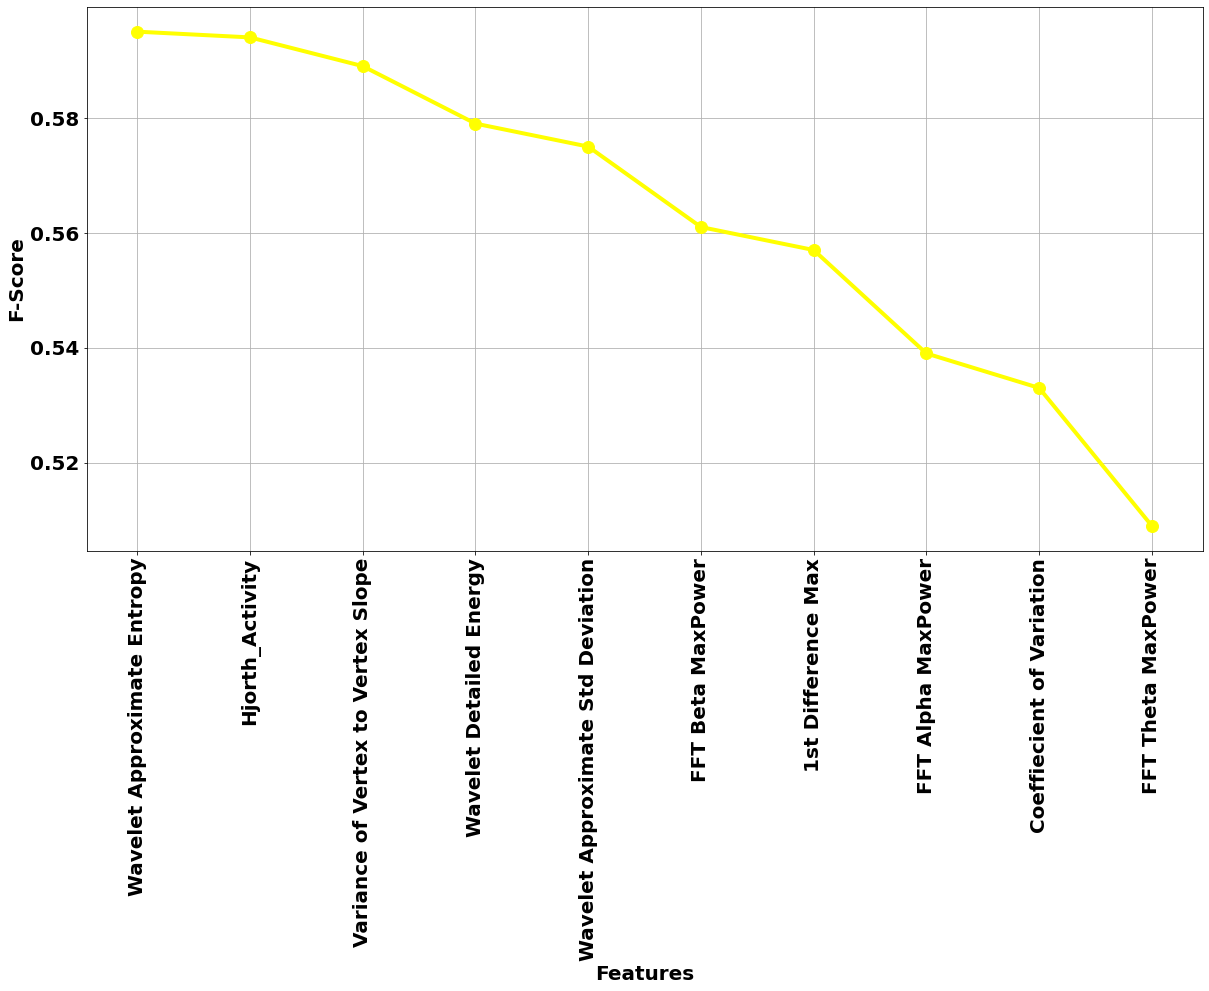

In [67]:
Corr_features =   {'Wavelet Approximate Entropy' : [0.595],
                   'Hjorth_Activity' : [0.594],
                   'Variance of Vertex to Vertex Slope' : [0.589],
                   'Wavelet Detailed Energy' : [0.579],
                   'Wavelet Approximate Std Deviation' : [0.575],
                   'FFT Beta MaxPower' : [0.561],
                   '1st Difference Max' : [0.557],
                   'FFT Alpha MaxPower' : [0.539],
                   'Coeffiecient of Variation' : [0.533],
                   'FFT Theta MaxPower' : [0.509]
                  }

Corr_df = pd.DataFrame(Corr_features)
# Corr_df

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(Corr_df.columns,Corr_df.iloc[0], color='yellow', marker='o', linestyle='solid', linewidth=4, markersize=12)
plt.xticks(Corr_df.columns, rotation='vertical',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.ylabel("F-Score",fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize=20,fontweight='bold')
plt.grid(b=None, which='major', axis='both')
plt.show()

In [68]:
Corr_df.columns

Index(['Wavelet Approximate Entropy', 'Hjorth_Activity',
       'Variance of Vertex to Vertex Slope', 'Wavelet Detailed Energy',
       'Wavelet Approximate Std Deviation', 'FFT Beta MaxPower',
       '1st Difference Max', 'FFT Alpha MaxPower', 'Coeffiecient of Variation',
       'FFT Theta MaxPower'],
      dtype='object')